In [185]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [186]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


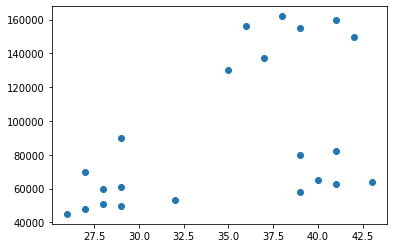

In [187]:
plt.scatter(df['Age'],df['Income($)'])

In [188]:
km = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [189]:
y_predicted=km.fit_predict(df[['Age','Income($)']].values)
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [190]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


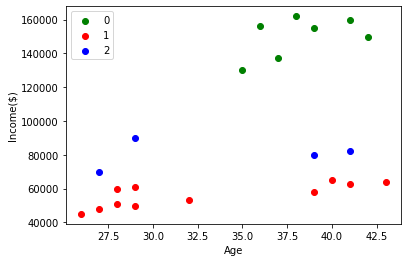

In [191]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1')
plt.scatter(df3.Age,df3['Income($)'],color='blue',label='2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

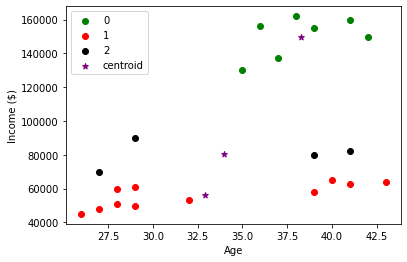

In [192]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [193]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [194]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [195]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


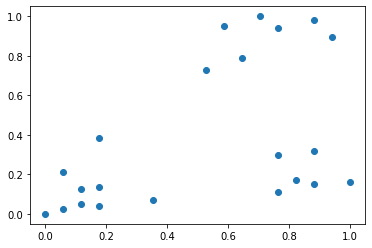

In [196]:
plt.scatter(df.Age,df['Income($)'])

In [197]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

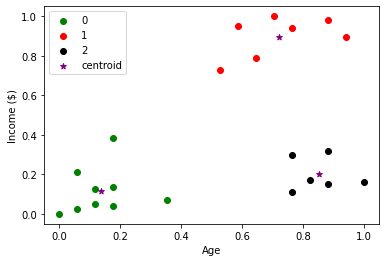

In [198]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [199]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']].values)
    sse.append(km.inertia_)

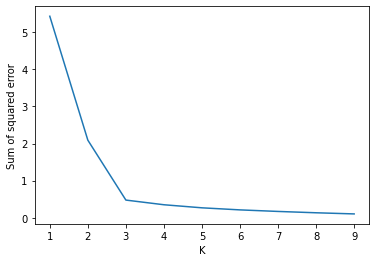

In [200]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [201]:
km.predict([[29,61000]])

array([2])

In [202]:
#Exercise

In [203]:
from sklearn.datasets import load_iris
iris=load_iris()
df =pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [204]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

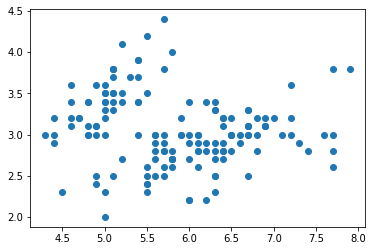

In [205]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

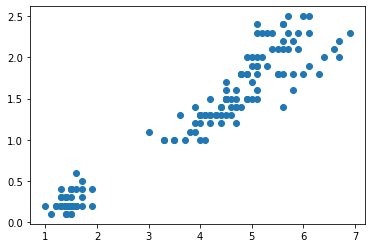

In [206]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [207]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

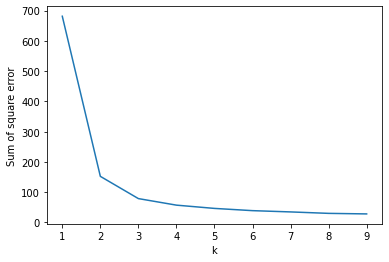

In [208]:
plt.xlabel('k')
plt.ylabel('Sum of square error')
plt.plot(k_range,sse)

In [228]:
scaler = MinMaxScaler()

scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])
dfscaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,2
146,0.555556,0.208333,0.677966,0.750000,2,0
147,0.611111,0.416667,0.711864,0.791667,2,2
148,0.527778,0.583333,0.745763,0.916667,2,2


In [229]:
km=KMeans(n_clusters=3)
l=km.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values)
y_predicted=l.predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [230]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [231]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1


In [232]:
df['cluster']=yp
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,0.222222,0.625000,0.067797,0.041667,0,2
1,0.166667,0.416667,0.067797,0.041667,0,2
2,0.111111,0.500000,0.050847,0.041667,0,2
3,0.083333,0.458333,0.084746,0.041667,0,2
4,0.194444,0.666667,0.067797,0.041667,0,2
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0
146,0.555556,0.208333,0.677966,0.750000,2,1
147,0.611111,0.416667,0.711864,0.791667,2,0
148,0.527778,0.583333,0.745763,0.916667,2,0


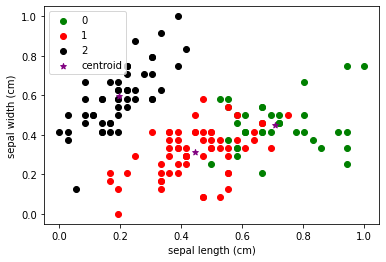

In [233]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label='0')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='1')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

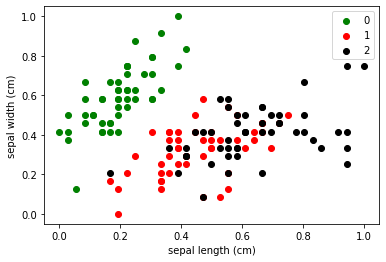

In [234]:
df1 = df[df.flower==0]
df2 = df[df.flower==1]
df3 = df[df.flower==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label='0')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='1')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black',label='2')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

In [235]:
df[df.flower!=df.cluster].shape

(102, 6)